In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [97]:
df = pd.read_csv('daiv_dataset_final_final.csv')

In [98]:
df_cad = df[df['cad_icd_code'].notna()]

In [99]:
df_not_cad = df[df['cad_icd_code'].isnull()]

In [100]:
df_not_cad

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,age,gender,...,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
0,10000635,26134563,25000,2,4019.0,3.0,NaN,NaN,74.0,F,...,N,N,N,N,N,N,N,N,N,N
4,10004322,28755331,25002,8,NaN,NaN,NaN,NaN,60.0,M,...,N,Y,N,N,N,N,N,N,N,N
5,10005236,25656545,25000,7,4019.0,6.0,NaN,NaN,76.0,M,...,N,Y,N,N,N,N,N,N,Y,N
6,10005368,24631981,25000,7,4019.0,6.0,NaN,NaN,23.0,M,...,N,N,N,N,N,N,N,N,N,N
7,10005749,20010003,25000,9,NaN,NaN,NaN,NaN,63.0,F,...,N,Y,N,N,N,N,Y,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19220,19996912,21274617,25000,5,4019.0,3.0,NaN,NaN,71.0,F,...,N,Y,N,N,N,N,N,N,N,N
19221,19998330,21135114,25002,7,NaN,NaN,NaN,NaN,72.0,F,...,N,Y,N,N,N,N,Y,N,N,N
19222,19998350,21130518,25000,2,4019.0,3.0,NaN,NaN,56.0,M,...,N,Y,N,N,N,N,N,N,N,N
19223,19998878,21643535,25060,11,NaN,NaN,NaN,NaN,56.0,M,...,N,Y,N,Y,N,N,Y,N,N,N


In [101]:
df_cad

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,age,gender,...,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
1,10001176,23334588,25000,2,4019.0,5.0,41401,6.0,64.0,F,...,N,Y,N,N,N,N,Y,N,N,N
2,10001877,21320596,25000,6,4019.0,7.0,412,8.0,90.0,M,...,N,Y,N,N,N,Y,N,N,Y,Y
3,10002976,21640325,25000,7,4019.0,10.0,41401,8.0,71.0,M,...,N,Y,N,N,N,N,N,N,N,N
8,10005817,20626031,25000,6,4019.0,14.0,41401,8.0,66.0,M,...,N,Y,N,N,N,N,Y,N,N,N
11,10007174,20280072,25040,3,NaN,NaN,41401,25.0,72.0,M,...,N,Y,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,17316767,25638301,25000,8,4019.0,13.0,41401,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19396,16875792,20539499,25000,4,4019.0,10.0,41401,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19397,18690013,26923936,25060,17,NaN,NaN,412,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19398,18967941,24407493,25000,20,4019.0,19.0,412,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
columns = ["bmi_min","bmi_max","bmi_mean","systolic_bp_min","systolic_bp_max","systolic_bp_mean","diastolic_bp_min","diastolic_bp_max","diastolic_bp_mean","glucose_min","glucose_max","glucose_mean","potassium_min","potassium_max","potassium_mean","sodium_min","sodium_max","sodium_mean","chloride_min","chloride_max","chloride_mean","creatinine_min","creatinine_max","creatinine_mean","urea_nitrogen_min","urea_nitrogen_max","urea_nitrogen_mean","bicarbonate_min","bicarbonate_max","bicarbonate_mean","anion_gap_min","anion_gap_max","anion_gap_mean","hematocrit_min","hematocrit_max","hematocrit_mean","hemoglobin_min","hemoglobin_max","hemoglobin_mean","platelet_count_min","platelet_count_max","platelet_count_mean","white_blood_cells_min","white_blood_cells_max","white_blood_cells_mean","magnesium_min","magnesium_max","magnesium_mean","mchc_min","mchc_max","mchc_mean","mch_min","mch_max","mch_mean","mcv_min","mcv_max","mcv_mean","red_blood_cells_min","red_blood_cells_max","red_blood_cells_mean","rdw_min","rdw_max","rdw_mean","phosphate_min","phosphate_max","phosphate_mean","calcium_total_min","calcium_total_max","calcium_total_mean","lactate_min","lactate_max","lactate_mean","monocytes_min","monocytes_max","monocytes_mean","eosinophils_min","eosinophils_max","eosinophils_mean","basophils_min","basophils_max","basophils_mean","neutrophils_min","neutrophils_max","neutrophils_mean"]

In [103]:
for column in columns:
    df_cad_2 = df_cad[df_cad[column].notna()]
    df_not_cad_2 = df_not_cad[df_not_cad[column].notna()]
    t_statistic, p_value = stats.ttest_ind(df_cad_2[column], df_not_cad_2[column])
    print("p-value: ", p_value, " for column: ", column)

p-value:  0.07479260347048948  for column:  bmi_min
p-value:  0.7032086801797548  for column:  bmi_max
p-value:  0.4687265778108042  for column:  bmi_mean
p-value:  0.003587868686441624  for column:  systolic_bp_min
p-value:  0.00011422398218791483  for column:  systolic_bp_max
p-value:  0.2396543722328726  for column:  systolic_bp_mean
p-value:  4.644135991832586e-14  for column:  diastolic_bp_min
p-value:  1.1606871046803997e-55  for column:  diastolic_bp_max
p-value:  1.1162770305751874e-80  for column:  diastolic_bp_mean
p-value:  1.9195013251256423e-19  for column:  glucose_min
p-value:  2.5645192737776005e-06  for column:  glucose_max
p-value:  0.24165629580340534  for column:  glucose_mean
p-value:  0.559709709894002  for column:  potassium_min
p-value:  1.1389673640822404e-31  for column:  potassium_max
p-value:  8.74095653212094e-19  for column:  potassium_mean
p-value:  2.8014680682392864e-08  for column:  sodium_min
p-value:  1.4990445377987073e-05  for column:  sodium_max
p

In [104]:
drop_columns = []
for column in columns:
    df_cad_2 = df_cad[df_cad[column].notna()]
    df_not_cad_2 = df_not_cad[df_not_cad[column].notna()]
    t_statistic, p_value = stats.ttest_ind(df_cad_2[column], df_not_cad_2[column])
    if p_value >= 0.05:
        print("p-value: ", p_value, " for column: ", column)
        drop_columns.append(column)

    # print("p-value: ", p_value, " for column: ", column)

p-value:  0.07479260347048948  for column:  bmi_min
p-value:  0.7032086801797548  for column:  bmi_max
p-value:  0.4687265778108042  for column:  bmi_mean
p-value:  0.2396543722328726  for column:  systolic_bp_mean
p-value:  0.24165629580340534  for column:  glucose_mean
p-value:  0.559709709894002  for column:  potassium_min
p-value:  0.49481490982377374  for column:  sodium_mean
p-value:  0.34972446791287704  for column:  chloride_max
p-value:  0.5241787615072957  for column:  bicarbonate_mean
p-value:  0.30751895342997726  for column:  anion_gap_min
p-value:  0.4063261606444424  for column:  white_blood_cells_min
p-value:  0.4003389574516022  for column:  white_blood_cells_mean
p-value:  0.766073946081396  for column:  mch_min
p-value:  0.16989201457491213  for column:  mch_mean
p-value:  0.31296695648569767  for column:  phosphate_min
p-value:  0.38004820395205263  for column:  calcium_total_max
p-value:  0.1306612907041037  for column:  calcium_total_mean
p-value:  0.1922547107752

In [105]:
t_dict = {}

for column in columns:
    df_cad_2 = df_cad[df_cad[column].notna()]
    df_not_cad_2 = df_not_cad[df_not_cad[column].notna()]
    t_statistic, p_value = stats.ttest_ind(df_cad_2[column], df_not_cad_2[column])

    t_dict[column] = p_value

In [106]:
t_dict

{'bmi_min': 0.07479260347048948,
 'bmi_max': 0.7032086801797548,
 'bmi_mean': 0.4687265778108042,
 'systolic_bp_min': 0.003587868686441624,
 'systolic_bp_max': 0.00011422398218791483,
 'systolic_bp_mean': 0.2396543722328726,
 'diastolic_bp_min': 4.644135991832586e-14,
 'diastolic_bp_max': 1.1606871046803997e-55,
 'diastolic_bp_mean': 1.1162770305751874e-80,
 'glucose_min': 1.9195013251256423e-19,
 'glucose_max': 2.5645192737776005e-06,
 'glucose_mean': 0.24165629580340534,
 'potassium_min': 0.559709709894002,
 'potassium_max': 1.1389673640822404e-31,
 'potassium_mean': 8.74095653212094e-19,
 'sodium_min': 2.8014680682392864e-08,
 'sodium_max': 1.4990445377987073e-05,
 'sodium_mean': 0.49481490982377374,
 'chloride_min': 9.805734748172338e-14,
 'chloride_max': 0.34972446791287704,
 'chloride_mean': 0.00010598231739203208,
 'creatinine_min': 2.193427946807014e-33,
 'creatinine_max': 6.593038795450332e-36,
 'creatinine_mean': 8.476857108441537e-38,
 'urea_nitrogen_min': 1.301183422000451e

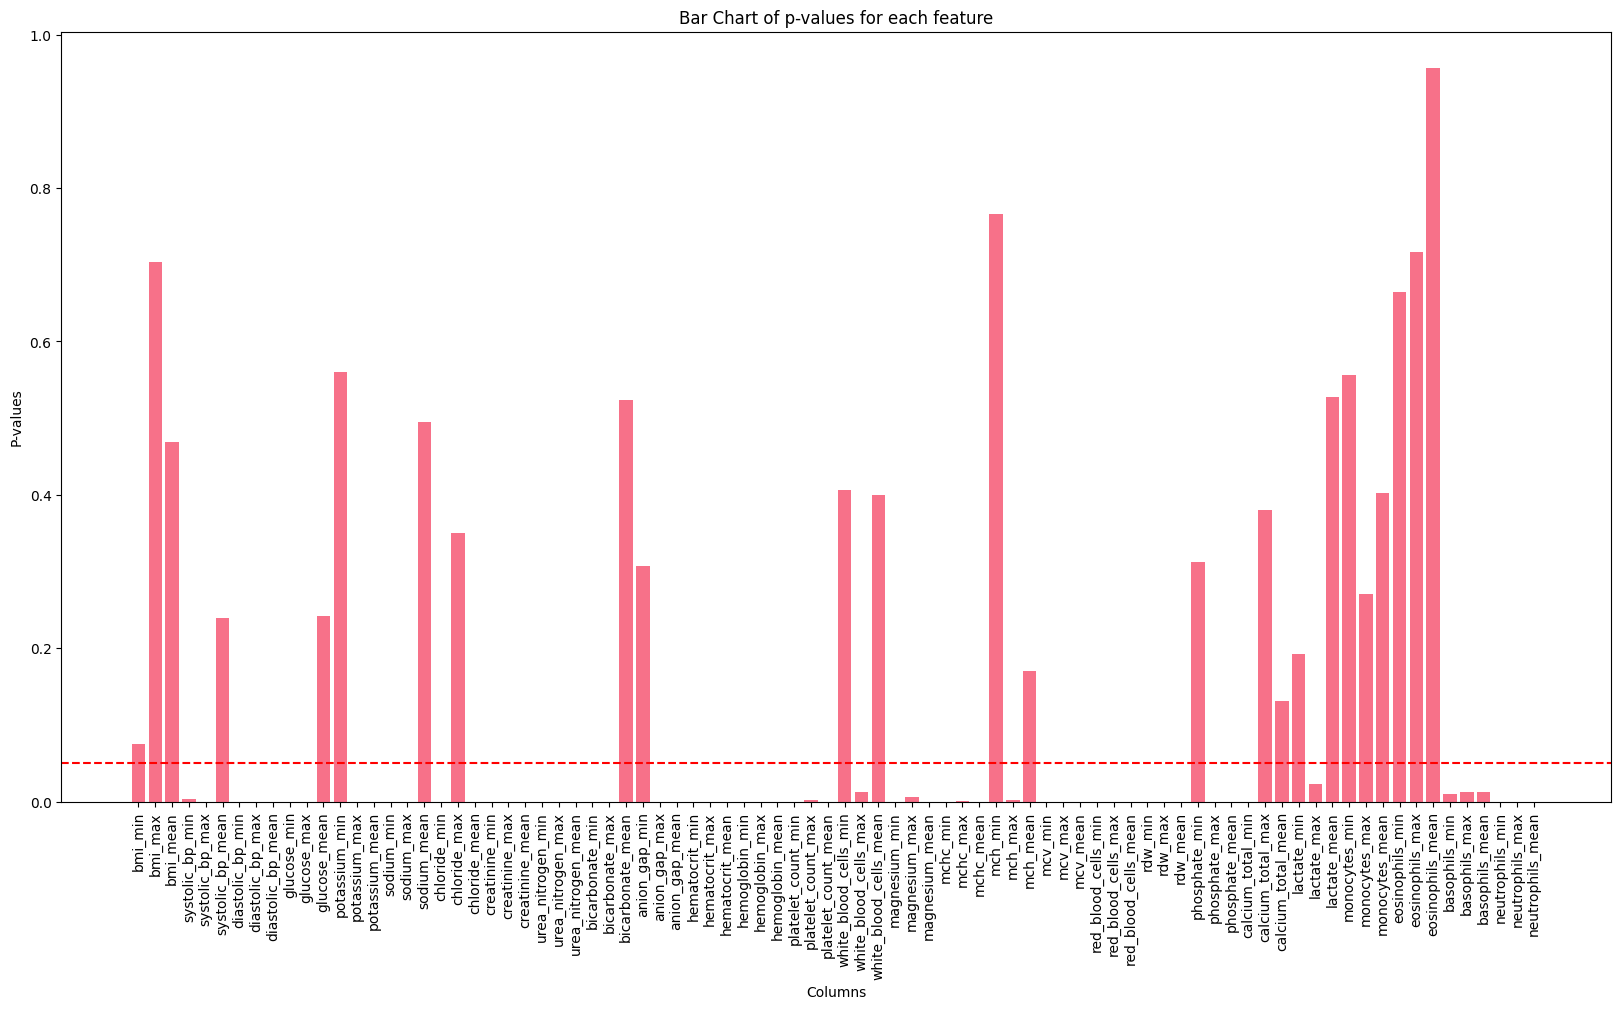

In [107]:
plt.figure(figsize=(20, 10))
keys = t_dict.keys()
values = t_dict.values()

sns.set_palette("husl")
plt.bar(keys, values)
plt.xlabel('Columns')
plt.ylabel('P-values')
plt.xticks(rotation=90)
plt.axhline(y=0.05, color='r', linestyle='--', label='Threshold')
plt.title('Bar Chart of p-values for each feature')
plt.show()

In [108]:
# 약물 복용 여부 count 비교

columns = ["heparin","clopidogrel","insulin","digoxin","sprionolactone","bumetanide","torsemide","furosemide","metolazone","simvastatin","allopurinol"]

cad_count_dict = {}
not_cad_count_dict = {}

for column in columns:
    df_cad_2 = df_cad[df_cad[column].notna()]
    df_not_cad_2 = df_not_cad[df_not_cad[column].notna()]
    
    cad_count_dict[column] = (df_cad_2[column] == 'Y').sum()
    not_cad_count_dict[column] = (df_not_cad_2[column] == 'Y').sum()

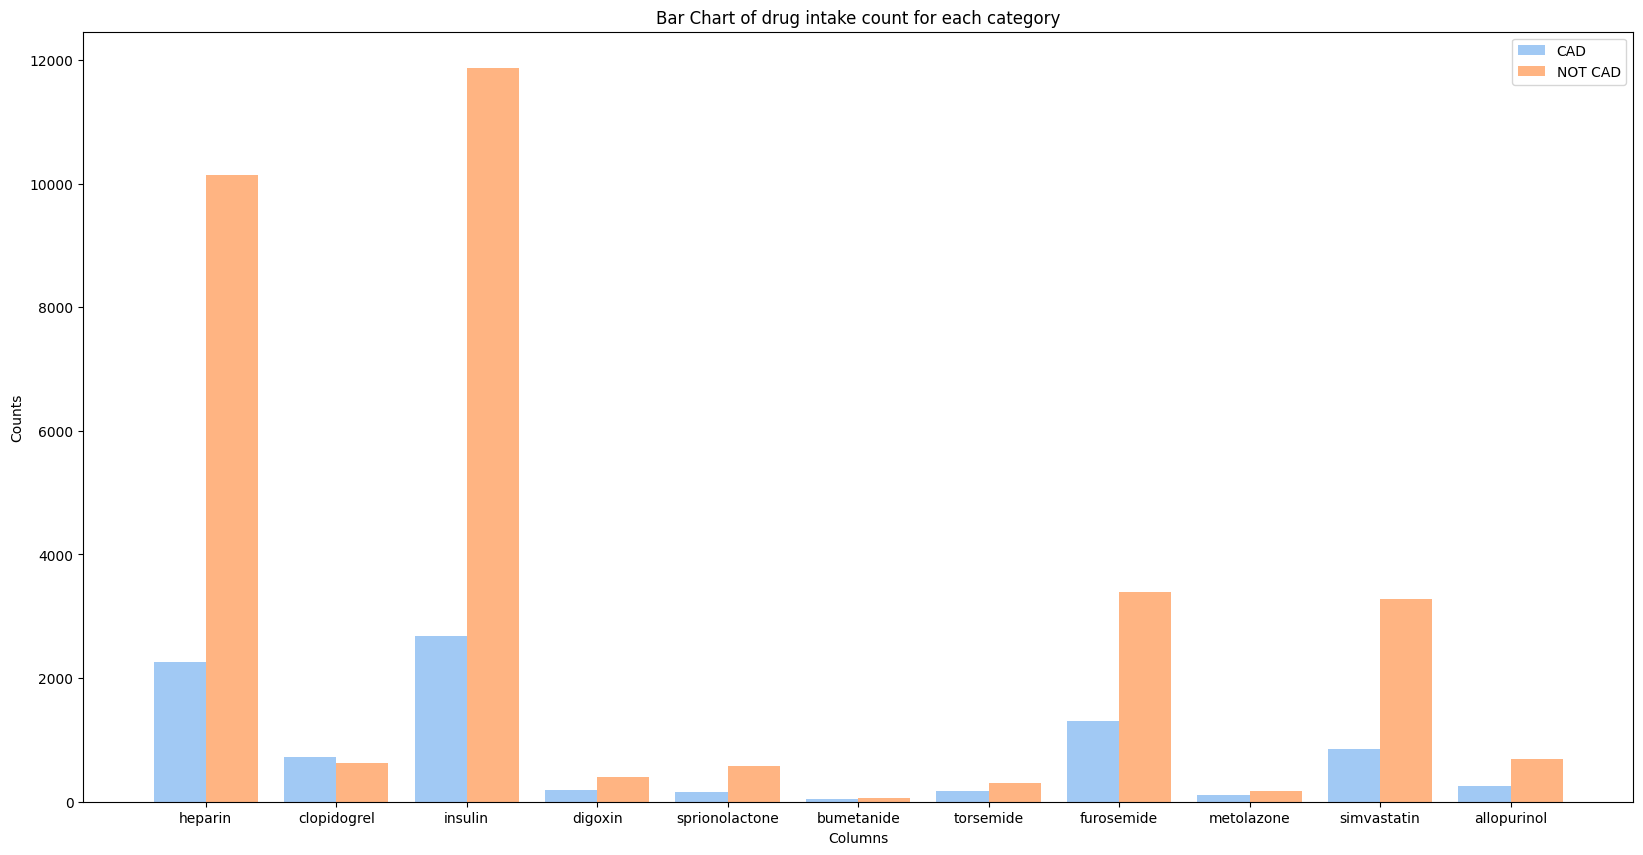

In [109]:
plt.figure(figsize=(20, 10))
cad = cad_count_dict.values()
not_cad = not_cad_count_dict.values()
categories = cad_count_dict.keys()
sns.set_palette("pastel")
x = np.arange(len(categories))
plt.bar(x - 0.2, cad, width=0.4, label='CAD')
plt.bar(x + 0.2, not_cad, width=0.4, label='NOT CAD')

# x 축 레이블 설정
plt.xticks(x, categories)

# 레이블과 제목 추가
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Bar Chart of drug intake count for each category')

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()

In [110]:
cad_count_dict

{'heparin': 2263,
 'clopidogrel': 717,
 'insulin': 2683,
 'digoxin': 187,
 'sprionolactone': 162,
 'bumetanide': 41,
 'torsemide': 179,
 'furosemide': 1305,
 'metolazone': 112,
 'simvastatin': 850,
 'allopurinol': 251}

In [111]:
not_cad_count_dict

{'heparin': 10133,
 'clopidogrel': 620,
 'insulin': 11863,
 'digoxin': 397,
 'sprionolactone': 578,
 'bumetanide': 64,
 'torsemide': 300,
 'furosemide': 3385,
 'metolazone': 170,
 'simvastatin': 3280,
 'allopurinol': 691}

In [112]:
'''
todo:
1) drop 할 칼럼 정해서 drop
2) 결측치 처리 방법 생각하기: 평균, 중앙값, 최빈값, 0, drop, interpolation
3) 인코딩
4) 정규화
'''

'\ntodo:\n1) drop 할 칼럼 정해서 drop\n2) 결측치 처리 방법 생각하기: 평균, 중앙값, 최빈값, 0, drop, interpolation\n3) 인코딩\n4) 정규화\n'

In [113]:
# Drop columns

drop_items = []

for items in drop_columns:
    item = items.split('_')[0]
    drop_items.append(item)

In [114]:
drop_items

['bmi',
 'bmi',
 'bmi',
 'systolic',
 'glucose',
 'potassium',
 'sodium',
 'chloride',
 'bicarbonate',
 'anion',
 'white',
 'white',
 'mch',
 'mch',
 'phosphate',
 'calcium',
 'calcium',
 'lactate',
 'lactate',
 'monocytes',
 'monocytes',
 'monocytes',
 'eosinophils',
 'eosinophils',
 'eosinophils']

In [115]:
"""
bmi_min                   NULL percent :     0.4132 Over Threshold
bmi_max                   NULL percent :     0.4132 Over Threshold
bmi_mean                  NULL percent :     0.4132 Over Threshold
systolic_bp_min           NULL percent :      0.395 Over Threshold
systolic_bp_max           NULL percent :      0.395 Over Threshold
systolic_bp_mean          NULL percent :      0.395 Over Threshold
diastolic_bp_min          NULL percent :      0.395 Over Threshold
diastolic_bp_max          NULL percent :      0.395 Over Threshold
diastolic_bp_mean         NULL percent :      0.395 Over Threshold
lactate_min               NULL percent :    0.76495 Over Threshold
lactate_max               NULL percent :    0.76495 Over Threshold
lactate_mean              NULL percent :    0.76495 Over Threshold
monocytes_min             NULL percent :    0.66902 Over Threshold
monocytes_max             NULL percent :    0.66902 Over Threshold
monocytes_mean            NULL percent :    0.66902 Over Threshold
eosinophils_min           NULL percent :    0.66902 Over Threshold
eosinophils_max           NULL percent :    0.66902 Over Threshold
eosinophils_mean          NULL percent :    0.66902 Over Threshold
basophils_min             NULL percent :    0.66902 Over Threshold
basophils_max             NULL percent :    0.66902 Over Threshold
basophils_mean            NULL percent :    0.66902 Over Threshold
neutrophils_min           NULL percent :    0.66902 Over Threshold
neutrophils_max           NULL percent :    0.66902 Over Threshold
neutrophils_mean          NULL percent :    0.66902 Over Threshold

"""

'\nbmi_min                   NULL percent :     0.4132 Over Threshold\nbmi_max                   NULL percent :     0.4132 Over Threshold\nbmi_mean                  NULL percent :     0.4132 Over Threshold\nsystolic_bp_min           NULL percent :      0.395 Over Threshold\nsystolic_bp_max           NULL percent :      0.395 Over Threshold\nsystolic_bp_mean          NULL percent :      0.395 Over Threshold\ndiastolic_bp_min          NULL percent :      0.395 Over Threshold\ndiastolic_bp_max          NULL percent :      0.395 Over Threshold\ndiastolic_bp_mean         NULL percent :      0.395 Over Threshold\nlactate_min               NULL percent :    0.76495 Over Threshold\nlactate_max               NULL percent :    0.76495 Over Threshold\nlactate_mean              NULL percent :    0.76495 Over Threshold\nmonocytes_min             NULL percent :    0.66902 Over Threshold\nmonocytes_max             NULL percent :    0.66902 Over Threshold\nmonocytes_mean            NULL percent :    0

In [116]:
drop_items = drop_items + ['bmi', 'systolic_bp', 'diastolic_bp', 'lactate', 'monocytes', 'eosinophils', 'basophils', 'neutrophils']

In [117]:
drop_items

['bmi',
 'bmi',
 'bmi',
 'systolic',
 'glucose',
 'potassium',
 'sodium',
 'chloride',
 'bicarbonate',
 'anion',
 'white',
 'white',
 'mch',
 'mch',
 'phosphate',
 'calcium',
 'calcium',
 'lactate',
 'lactate',
 'monocytes',
 'monocytes',
 'monocytes',
 'eosinophils',
 'eosinophils',
 'eosinophils',
 'bmi',
 'systolic_bp',
 'diastolic_bp',
 'lactate',
 'monocytes',
 'eosinophils',
 'basophils',
 'neutrophils']

In [118]:
drop_items_set = set(drop_items)

In [119]:
drop_items_set

{'anion',
 'basophils',
 'bicarbonate',
 'bmi',
 'calcium',
 'chloride',
 'diastolic_bp',
 'eosinophils',
 'glucose',
 'lactate',
 'mch',
 'monocytes',
 'neutrophils',
 'phosphate',
 'potassium',
 'sodium',
 'systolic',
 'systolic_bp',
 'white'}

In [120]:
columns_to_remove = [col for col in df.columns if any(word in col for word in drop_items_set)]

In [121]:
columns_to_remove

['bmi_min',
 'bmi_max',
 'bmi_mean',
 'systolic_bp_min',
 'systolic_bp_max',
 'systolic_bp_mean',
 'diastolic_bp_min',
 'diastolic_bp_max',
 'diastolic_bp_mean',
 'glucose_min',
 'glucose_max',
 'glucose_mean',
 'potassium_min',
 'potassium_max',
 'potassium_mean',
 'sodium_min',
 'sodium_max',
 'sodium_mean',
 'chloride_min',
 'chloride_max',
 'chloride_mean',
 'bicarbonate_min',
 'bicarbonate_max',
 'bicarbonate_mean',
 'anion_gap_min',
 'anion_gap_max',
 'anion_gap_mean',
 'white_blood_cells_min',
 'white_blood_cells_max',
 'white_blood_cells_mean',
 'mchc_min',
 'mchc_max',
 'mchc_mean',
 'mch_min',
 'mch_max',
 'mch_mean',
 'phosphate_min',
 'phosphate_max',
 'phosphate_mean',
 'calcium_total_min',
 'calcium_total_max',
 'calcium_total_mean',
 'lactate_min',
 'lactate_max',
 'lactate_mean',
 'monocytes_min',
 'monocytes_max',
 'monocytes_mean',
 'eosinophils_min',
 'eosinophils_max',
 'eosinophils_mean',
 'basophils_min',
 'basophils_max',
 'basophils_mean',
 'neutrophils_min',
 '

In [122]:
for column in columns_to_remove:
    df = df.drop(column, axis=1)

In [123]:
df

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,age,gender,...,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
0,10000635,26134563,25000,2,4019.0,3.0,NaN,NaN,74.0,F,...,N,N,N,N,N,N,N,N,N,N
1,10001176,23334588,25000,2,4019.0,5.0,41401,6.0,64.0,F,...,N,Y,N,N,N,N,Y,N,N,N
2,10001877,21320596,25000,6,4019.0,7.0,412,8.0,90.0,M,...,N,Y,N,N,N,Y,N,N,Y,Y
3,10002976,21640325,25000,7,4019.0,10.0,41401,8.0,71.0,M,...,N,Y,N,N,N,N,N,N,N,N
4,10004322,28755331,25002,8,NaN,NaN,NaN,NaN,60.0,M,...,N,Y,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,17316767,25638301,25000,8,4019.0,13.0,41401,11.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19396,16875792,20539499,25000,4,4019.0,10.0,41401,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19397,18690013,26923936,25060,17,NaN,NaN,412,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19398,18967941,24407493,25000,20,4019.0,19.0,412,31.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
# 결측치 처리
# 처리 방법: 아무것도 안 하기 (xgboost에서 자체적으로 처리), 평균, 중앙값, 최빈값, 0, drop, interpolation
# 딥러닝을 이용한 imputation도 가능 
# 범주형 데이터는 최빈값으로 처리
# 진단 순서에 대한 데이터의 결측치는 처리를 하는 방법이 따로 있을까?

In [125]:
# 우선 범주형 데이터만 먼저 처리

df[categories].isnull().sum()

heparin           174
clopidogrel       174
insulin           174
digoxin           174
sprionolactone    174
bumetanide        174
torsemide         174
furosemide        174
metolazone        174
simvastatin       174
allopurinol       174
dtype: int64

In [126]:
for column in categories:
    df[column] = df[column].fillna(df[column].mode()[0]) # 최빈값으로 결측치 처리
    print(df[column].value_counts())

Y    12570
N     6830
Name: heparin, dtype: int64
N    18063
Y     1337
Name: clopidogrel, dtype: int64
Y    14720
N     4680
Name: insulin, dtype: int64
N    18816
Y      584
Name: digoxin, dtype: int64
N    18660
Y      740
Name: sprionolactone, dtype: int64
N    19295
Y      105
Name: bumetanide, dtype: int64
N    18921
Y      479
Name: torsemide, dtype: int64
N    14710
Y     4690
Name: furosemide, dtype: int64
N    19118
Y      282
Name: metolazone, dtype: int64
N    15270
Y     4130
Name: simvastatin, dtype: int64
N    18458
Y      942
Name: allopurinol, dtype: int64


In [127]:
df[categories].isnull().sum() # 범주형 데이터 결측치 처리 완료

heparin           0
clopidogrel       0
insulin           0
digoxin           0
sprionolactone    0
bumetanide        0
torsemide         0
furosemide        0
metolazone        0
simvastatin       0
allopurinol       0
dtype: int64

In [128]:
# 수치형 데이터 결측치 처리
# 일단 데이터의 분포를 보고 결정할까?

columns = set(df.columns)-set(categories)

In [129]:
len(columns)

38

In [130]:
df[columns].isnull().sum()

/var/folders/kj/sg4104lx17s7w40hgw_h6pxr0000gn/T/ipykernel_3517/2611666104.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[columns].isnull().sum()


age                       174
creatinine_mean          3228
hadm_id                     0
red_blood_cells_min      3382
urea_nitrogen_max        3298
mcv_max                  3382
creatinine_max           3228
mcv_mean                 3382
platelet_count_max       3352
rdw_max                  3382
cad_seq_num             16161
hemoglobin_min           3351
hemoglobin_mean          3351
red_blood_cells_mean     3382
hp_seq_num               8801
rdw_min                  3382
magnesium_mean           4466
gender                    174
magnesium_max            4466
hemoglobin_max           3351
hematocrit_max           3153
platelet_count_mean      3352
urea_nitrogen_mean       3298
diabetes_icd_code           0
subject_id                  0
hematocrit_mean          3153
red_blood_cells_max      3382
cad_icd_code            16161
mcv_min                  3382
creatinine_min           3228
hp_icd_code              8801
rdw_mean                 3382
urea_nitrogen_min        3298
diabetes_s

In [131]:
# 결측치 대체할 칼럼 중 hp_icd_code, hp_seq_num, cad_icd_code, cad_seq_num은 제외
# 그리고 id 관련 칼럼도 제외

columns = columns - set(['hp_icd_code', 'hp_seq_num', 'cad_icd_code', 'cad_seq_num', 'subject_id', 'hadm_id', 'diabetes_icd_code', 'diabetes_seq_num'])

In [132]:
len(columns) #38->30개로 잘 줄어든 것을 확인

30

In [133]:
# 수치형 데이터가 아닌 것들 : race, gender -> 제외시키자.
numerical_column = columns - set(['race', 'gender'])

In [134]:
numerical_column

{'age',
 'creatinine_max',
 'creatinine_mean',
 'creatinine_min',
 'hematocrit_max',
 'hematocrit_mean',
 'hematocrit_min',
 'hemoglobin_max',
 'hemoglobin_mean',
 'hemoglobin_min',
 'magnesium_max',
 'magnesium_mean',
 'magnesium_min',
 'mcv_max',
 'mcv_mean',
 'mcv_min',
 'platelet_count_max',
 'platelet_count_mean',
 'platelet_count_min',
 'rdw_max',
 'rdw_mean',
 'rdw_min',
 'red_blood_cells_max',
 'red_blood_cells_mean',
 'red_blood_cells_min',
 'urea_nitrogen_max',
 'urea_nitrogen_mean',
 'urea_nitrogen_min'}

In [135]:
df[numerical_column].isnull().sum()

/var/folders/kj/sg4104lx17s7w40hgw_h6pxr0000gn/T/ipykernel_3517/4286672352.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[numerical_column].isnull().sum()


age                      174
red_blood_cells_max     3382
creatinine_mean         3228
red_blood_cells_min     3382
urea_nitrogen_max       3298
mcv_max                 3382
creatinine_max          3228
mcv_min                 3382
mcv_mean                3382
platelet_count_max      3352
rdw_max                 3382
creatinine_min          3228
hemoglobin_min          3351
hemoglobin_mean         3351
red_blood_cells_mean    3382
rdw_min                 3382
rdw_mean                3382
magnesium_mean          4466
urea_nitrogen_min       3298
magnesium_max           4466
magnesium_min           4466
hematocrit_min          3153
hemoglobin_max          3351
hematocrit_max          3153
platelet_count_mean     3352
urea_nitrogen_mean      3298
platelet_count_min      3352
hematocrit_mean         3153
dtype: int64

In [136]:
# race, gender 결측치 처리 -> 최빈값으로 처리
for column in ['race', 'gender']:
    df[column] = df[column].fillna(df[column].mode()[0]) # 최빈값으로 결측치 처리
    print(df[column].value_counts())

WHITE                                        11399
BLACK/AFRICAN AMERICAN                        3263
OTHER                                          721
UNKNOWN                                        596
HISPANIC OR LATINO                             565
HISPANIC/LATINO - PUERTO RICAN                 407
ASIAN - CHINESE                                255
ASIAN                                          253
WHITE - RUSSIAN                                252
HISPANIC/LATINO - DOMINICAN                    212
BLACK/CAPE VERDEAN                             201
WHITE - OTHER EUROPEAN                         190
BLACK/CARIBBEAN ISLAND                         164
UNABLE TO OBTAIN                               150
BLACK/AFRICAN                                  110
PATIENT DECLINED TO ANSWER                     106
ASIAN - SOUTH EAST ASIAN                        73
PORTUGUESE                                      59
ASIAN - ASIAN INDIAN                            54
HISPANIC/LATINO - GUATEMALAN   

In [137]:
%pip install impyute

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [138]:
from impyute.imputation.cs import fast_knn
# KNN 학습
np_imputed = fast_knn(df[numerical_column].values, k=5)

df_numerical_imputed = pd.DataFrame(np_imputed)

/var/folders/kj/sg4104lx17s7w40hgw_h6pxr0000gn/T/ipykernel_3517/1625202517.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  np_imputed = fast_knn(df[numerical_column].values, k=5)


In [140]:
df_numerical_imputed.columns = numerical_column

In [141]:
df2 = df.drop(numerical_column, axis=1)

In [144]:
df

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,age,gender,...,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
0,10000635,26134563,25000,2,4019.0,3.0,NaN,NaN,74.0,F,...,N,N,N,N,N,N,N,N,N,N
1,10001176,23334588,25000,2,4019.0,5.0,41401,6.0,64.0,F,...,N,Y,N,N,N,N,Y,N,N,N
2,10001877,21320596,25000,6,4019.0,7.0,412,8.0,90.0,M,...,N,Y,N,N,N,Y,N,N,Y,Y
3,10002976,21640325,25000,7,4019.0,10.0,41401,8.0,71.0,M,...,N,Y,N,N,N,N,N,N,N,N
4,10004322,28755331,25002,8,NaN,NaN,NaN,NaN,60.0,M,...,N,Y,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,17316767,25638301,25000,8,4019.0,13.0,41401,11.0,NaN,F,...,N,Y,N,N,N,N,N,N,N,N
19396,16875792,20539499,25000,4,4019.0,10.0,41401,7.0,NaN,F,...,N,Y,N,N,N,N,N,N,N,N
19397,18690013,26923936,25060,17,NaN,NaN,412,23.0,NaN,F,...,N,Y,N,N,N,N,N,N,N,N
19398,18967941,24407493,25000,20,4019.0,19.0,412,31.0,NaN,F,...,N,Y,N,N,N,N,N,N,N,N


In [142]:
df2

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,gender,race,...,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
0,10000635,26134563,25000,2,4019.0,3.0,NaN,NaN,F,BLACK/AFRICAN AMERICAN,...,N,N,N,N,N,N,N,N,N,N
1,10001176,23334588,25000,2,4019.0,5.0,41401,6.0,F,WHITE,...,N,Y,N,N,N,N,Y,N,N,N
2,10001877,21320596,25000,6,4019.0,7.0,412,8.0,M,WHITE,...,N,Y,N,N,N,Y,N,N,Y,Y
3,10002976,21640325,25000,7,4019.0,10.0,41401,8.0,M,WHITE,...,N,Y,N,N,N,N,N,N,N,N
4,10004322,28755331,25002,8,NaN,NaN,NaN,NaN,M,WHITE,...,N,Y,N,N,N,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,17316767,25638301,25000,8,4019.0,13.0,41401,11.0,F,WHITE,...,N,Y,N,N,N,N,N,N,N,N
19396,16875792,20539499,25000,4,4019.0,10.0,41401,7.0,F,WHITE,...,N,Y,N,N,N,N,N,N,N,N
19397,18690013,26923936,25060,17,NaN,NaN,412,23.0,F,WHITE,...,N,Y,N,N,N,N,N,N,N,N
19398,18967941,24407493,25000,20,4019.0,19.0,412,31.0,F,WHITE,...,N,Y,N,N,N,N,N,N,N,N


In [147]:
df_imputed = pd.concat([df2, df_numerical_imputed], axis=1)

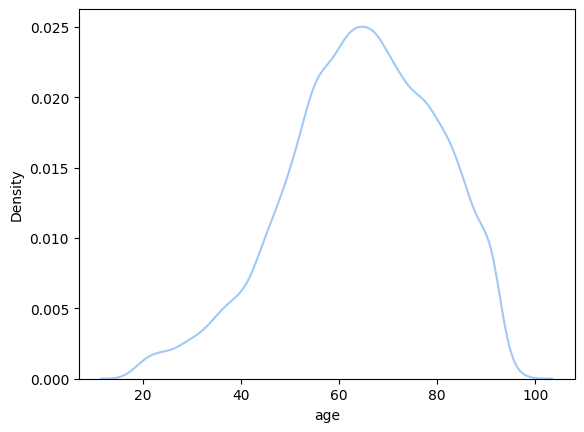

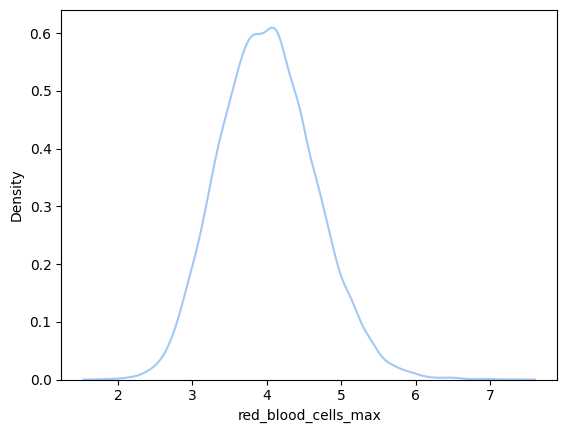

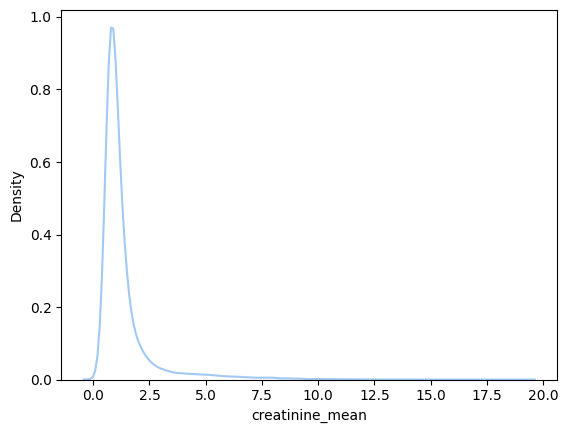

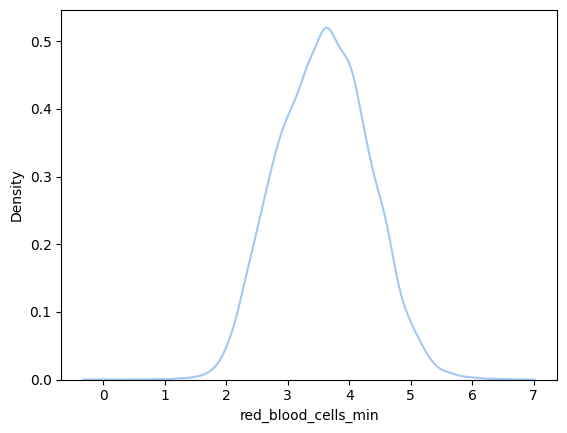

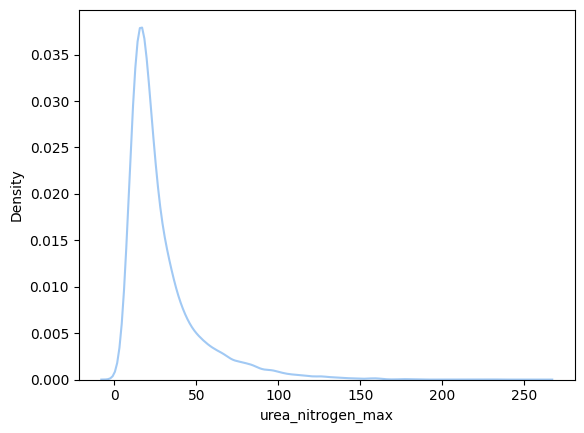

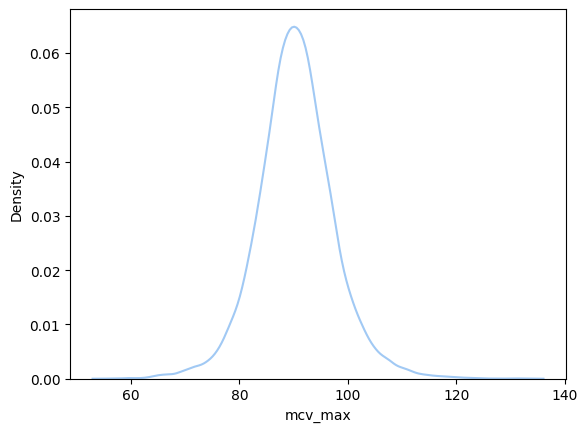

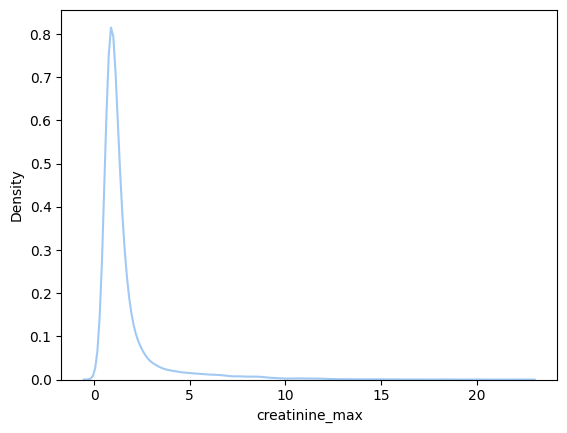

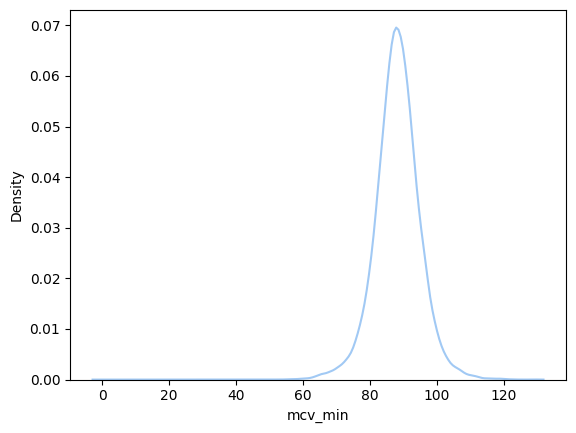

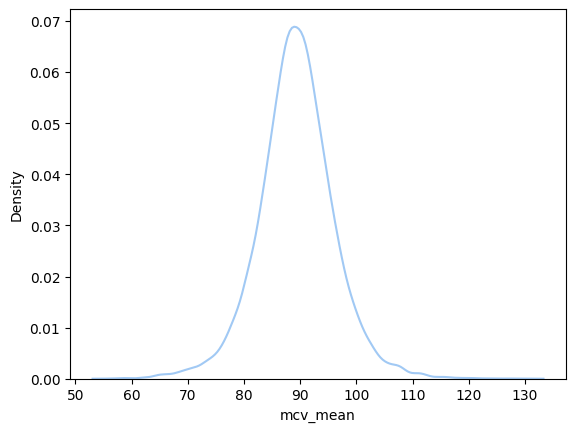

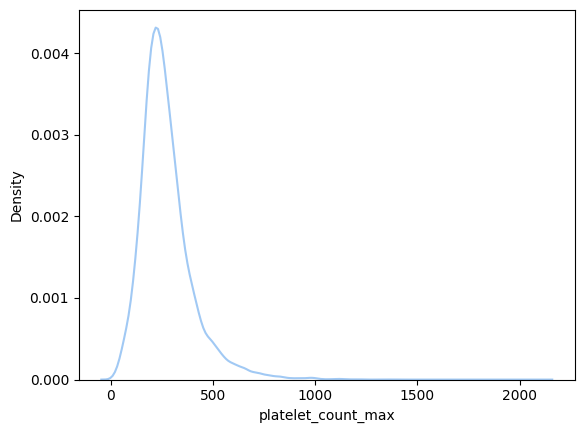

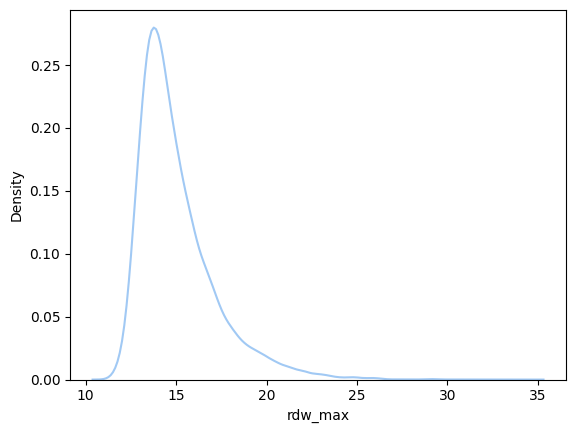

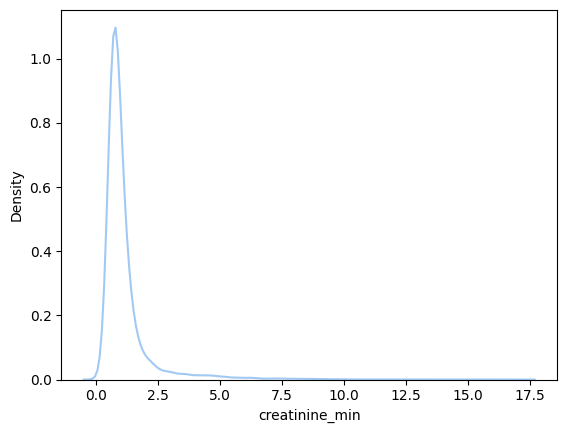

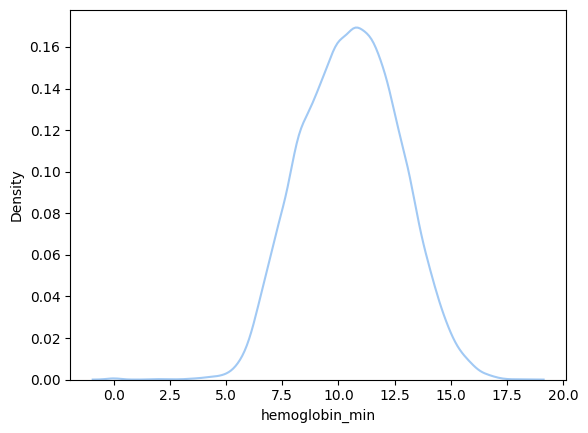

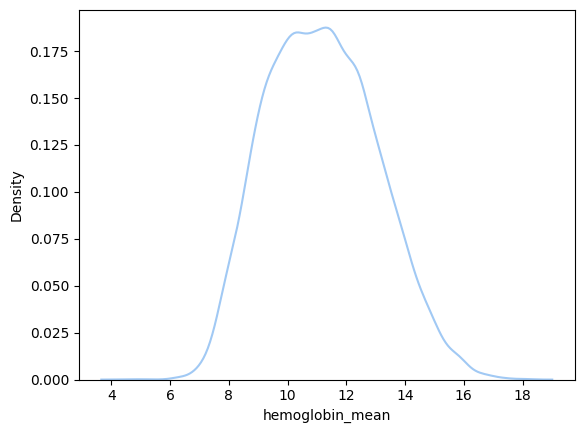

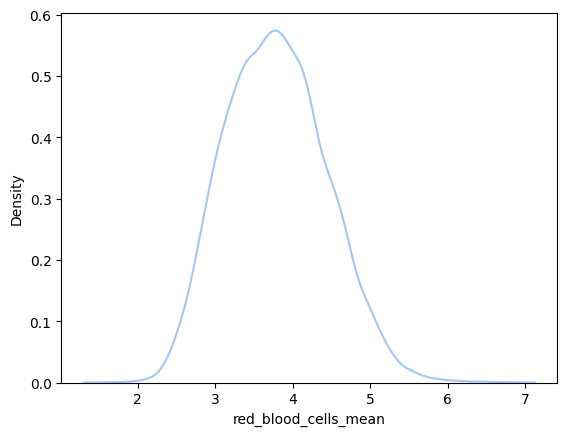

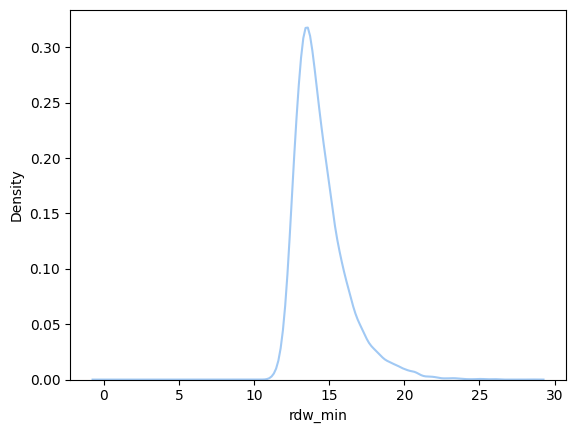

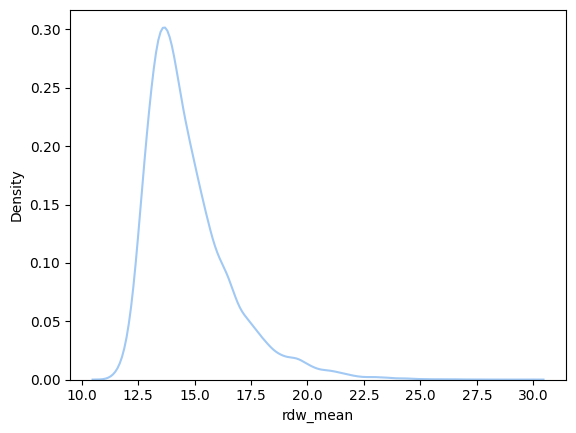

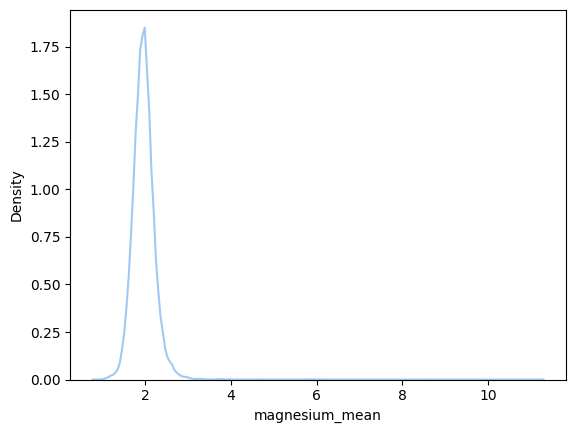

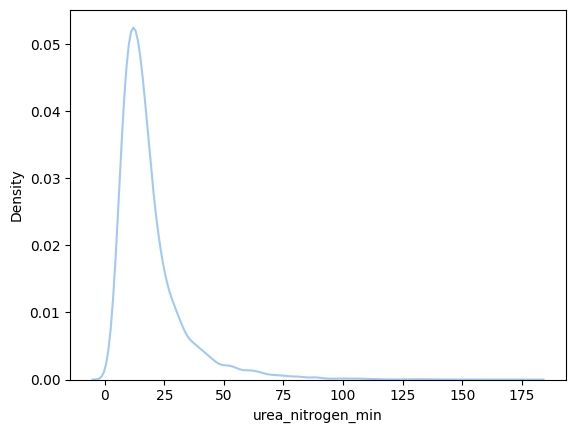

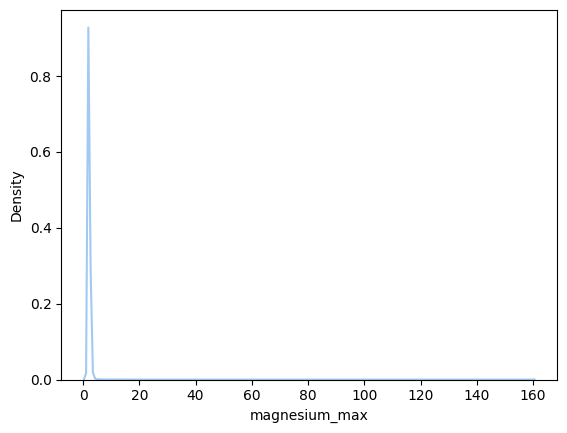

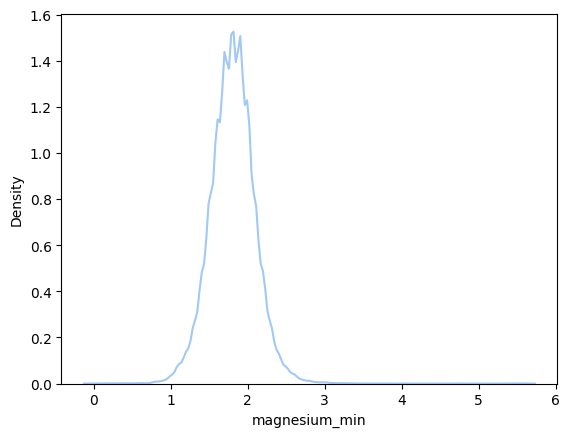

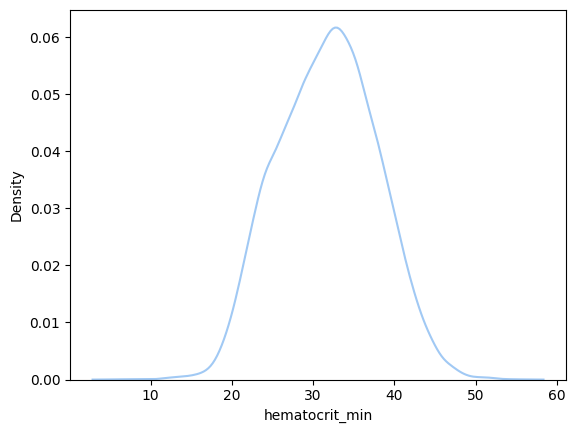

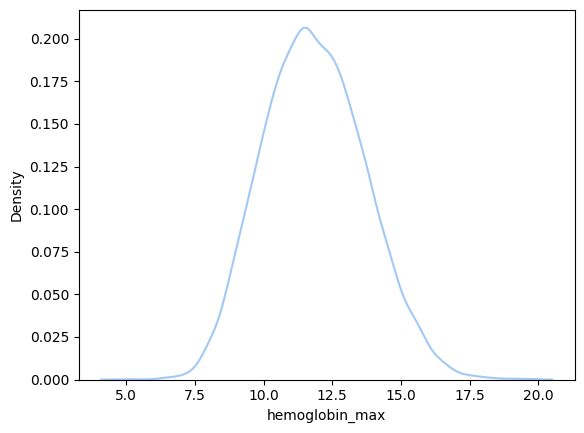

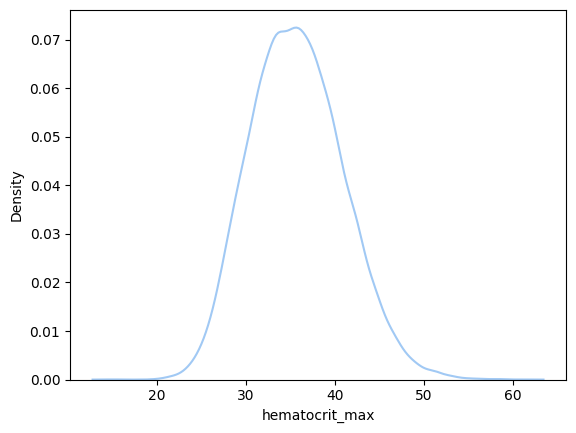

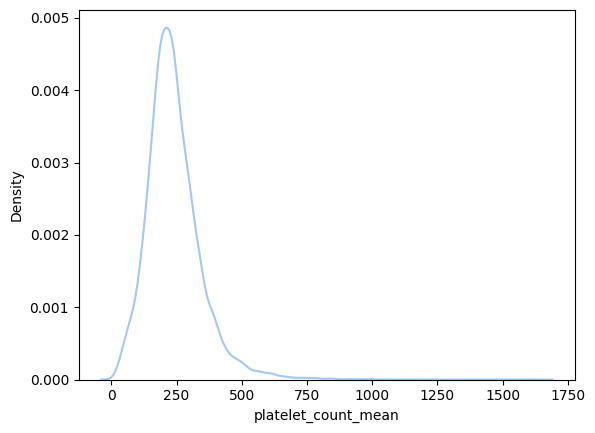

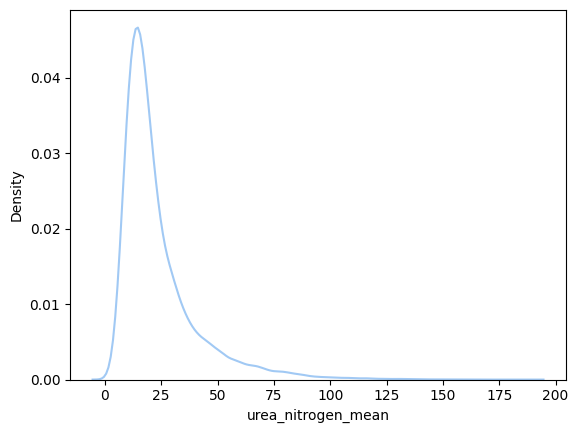

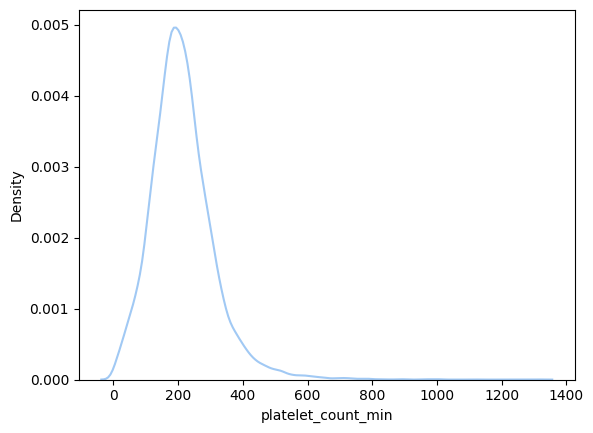

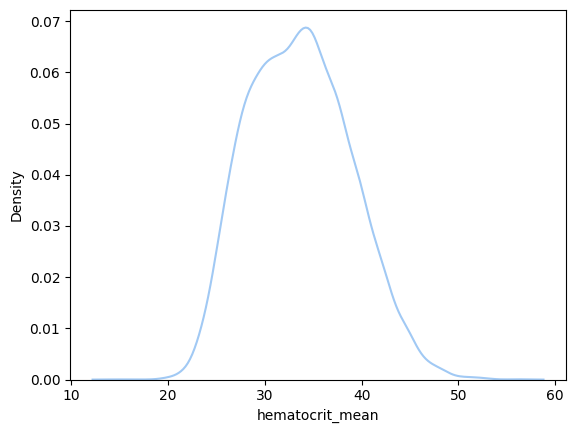

In [148]:
for column in numerical_column:
    sns.kdeplot(x=df[column])
    plt.show()

In [149]:
df_imputed.isnull().sum()

subject_id                  0
hadm_id                     0
diabetes_icd_code           0
diabetes_seq_num            0
hp_icd_code              8801
hp_seq_num               8801
cad_icd_code            16161
cad_seq_num             16161
gender                      0
race                        0
heparin                     0
clopidogrel                 0
insulin                     0
digoxin                     0
sprionolactone              0
bumetanide                  0
torsemide                   0
furosemide                  0
metolazone                  0
simvastatin                 0
allopurinol                 0
age                         0
red_blood_cells_max         0
creatinine_mean             0
red_blood_cells_min         0
urea_nitrogen_max           0
mcv_max                     0
creatinine_max              0
mcv_min                     0
mcv_mean                    0
platelet_count_max          0
rdw_max                     0
creatinine_min              0
hemoglobin

In [152]:
# 결측치 처리 완료.

# 인코딩 진행
# 인코딩 필요한 열: gender, race, categories 값들

# 약물 관련 정보: Y(1), N(0)로 인코딩
for column in categories:
    df_imputed[column] = df_imputed[column].replace({'Y': 1, 'N': 0})

df_imputed[categories]


,heparin,clopidogrel,insulin,digoxin,sprionolactone,bumetanide,torsemide,furosemide,metolazone,simvastatin,allopurinol
0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,1,0,0,0
2,1,0,1,0,0,0,1,0,0,1,1
3,1,0,1,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
19395,1,0,1,0,0,0,0,0,0,0,0
19396,1,0,1,0,0,0,0,0,0,0,0
19397,1,0,1,0,0,0,0,0,0,0,0
19398,1,0,1,0,0,0,0,0,0,0,0


In [153]:
# gender: M(1), F(0)로 인코딩
df_imputed['gender'] = df_imputed['gender'].replace({'M': 1, 'F': 0})

In [154]:
df_imputed['gender']

0        0
1        0
2        1
3        1
4        1
        ..
19395    0
19396    0
19397    0
19398    0
19399    0
Name: gender, Length: 19400, dtype: int64

In [156]:
# race: 여러 종류가 있음 -> 원 핫 인코딩

from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(df_imputed[['race']])
df_imputed_2 = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['race']))

df_imputed_2


,race_AMERICAN INDIAN/ALASKA NATIVE,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,race_BLACK/AFRICAN AMERICAN,race_BLACK/CAPE VERDEAN,race_BLACK/CARIBBEAN ISLAND,...,race_PATIENT DECLINED TO ANSWER,race_PORTUGUESE,race_SOUTH AMERICAN,race_UNABLE TO OBTAIN,race_UNKNOWN,race_WHITE,race_WHITE - BRAZILIAN,race_WHITE - EASTERN EUROPEAN,race_WHITE - OTHER EUROPEAN,race_WHITE - RUSSIAN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [157]:
# one hot encoding 사용 시에 차원이 지나치게 늘어난다는 단점이 있음.
# -> frequency encoding 사용

freq_encoding = (df_imputed.groupby('race').size()) / len(df_imputed)

In [158]:
freq_encoding

race
AMERICAN INDIAN/ALASKA NATIVE                0.001856
ASIAN                                        0.013041
ASIAN - ASIAN INDIAN                         0.002784
ASIAN - CHINESE                              0.013144
ASIAN - KOREAN                               0.000670
ASIAN - SOUTH EAST ASIAN                     0.003763
BLACK/AFRICAN                                0.005670
BLACK/AFRICAN AMERICAN                       0.168196
BLACK/CAPE VERDEAN                           0.010361
BLACK/CARIBBEAN ISLAND                       0.008454
HISPANIC OR LATINO                           0.029124
HISPANIC/LATINO - CENTRAL AMERICAN           0.000928
HISPANIC/LATINO - COLUMBIAN                  0.001392
HISPANIC/LATINO - CUBAN                      0.001443
HISPANIC/LATINO - DOMINICAN                  0.010928
HISPANIC/LATINO - GUATEMALAN                 0.002526
HISPANIC/LATINO - HONDURAN                   0.001186
HISPANIC/LATINO - MEXICAN                    0.001392
HISPANIC/LATINO - PUERT

In [159]:
df_imputed['race_encoded'] = df_imputed['race'].apply(lambda x : freq_encoding[x])

In [160]:
df_imputed['race_encoded']

0        0.168196
1        0.587577
2        0.587577
3        0.587577
4        0.587577
           ...   
19395    0.587577
19396    0.587577
19397    0.587577
19398    0.587577
19399    0.587577
Name: race_encoded, Length: 19400, dtype: float64

In [161]:
df_imputed_final = df_imputed.drop(['race'], axis = 1)

In [162]:
df_imputed_final

,subject_id,hadm_id,diabetes_icd_code,diabetes_seq_num,hp_icd_code,hp_seq_num,cad_icd_code,cad_seq_num,gender,heparin,...,magnesium_max,magnesium_min,hematocrit_min,hemoglobin_max,hematocrit_max,platelet_count_mean,urea_nitrogen_mean,platelet_count_min,hematocrit_mean,race_encoded
0,10000635,26134563,25000,2,4019.0,3.0,NaN,NaN,0,0,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.168196
1,10001176,23334588,25000,2,4019.0,5.0,41401,6.0,0,1,...,1.800000,1.700000,28.500000,11.500000,35.400000,190.000000,16.333300,176.000000,32.680000,0.587577
2,10001877,21320596,25000,6,4019.0,7.0,412,8.0,1,1,...,1.918279,1.918279,39.300000,12.900000,39.300000,95.000000,43.500000,95.000000,39.300000,0.587577
3,10002976,21640325,25000,7,4019.0,10.0,41401,8.0,1,1,...,2.100000,1.900000,30.400000,12.300000,37.700000,571.000000,14.400000,535.000000,32.928600,0.587577
4,10004322,28755331,25002,8,NaN,NaN,NaN,NaN,1,1,...,2.200000,2.000000,35.300000,12.600000,37.400000,317.000000,15.500000,316.000000,36.350000,0.587577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19395,17316767,25638301,25000,8,4019.0,13.0,41401,11.0,0,1,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19396,16875792,20539499,25000,4,4019.0,10.0,41401,7.0,0,1,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19397,18690013,26923936,25060,17,NaN,NaN,412,23.0,0,1,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577
19398,18967941,24407493,25000,20,4019.0,19.0,412,31.0,0,1,...,2.172606,1.804138,31.741238,11.858272,35.729242,240.294055,23.691527,213.197345,33.611756,0.587577


In [163]:
df_imputed_final.to_csv('daiv_dataset_final_final_preprocessed.csv', index=False)